In [1]:
import cv2

In [2]:
flags = [i for i in dir(cv2) if i.startswith('COLOR_')]

In [3]:
len(flags)

274

In [4]:
flags[40]

'COLOR_BGR2HLS'

In [5]:
import matplotlib.pyplot as plt
import numpy as np

In [6]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors
from matplotlib.colors import hsv_to_rgb

# Segmentation of Nemo

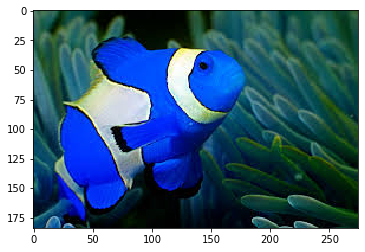

In [7]:
nemo = cv2.imread('../resources/nemo.jpg')
plt.imshow(nemo)
plt.show()

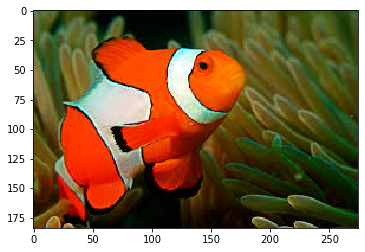

In [8]:
nemo = cv2.cvtColor(nemo, cv2.COLOR_BGR2RGB)
plt.imshow(nemo)
plt.show()

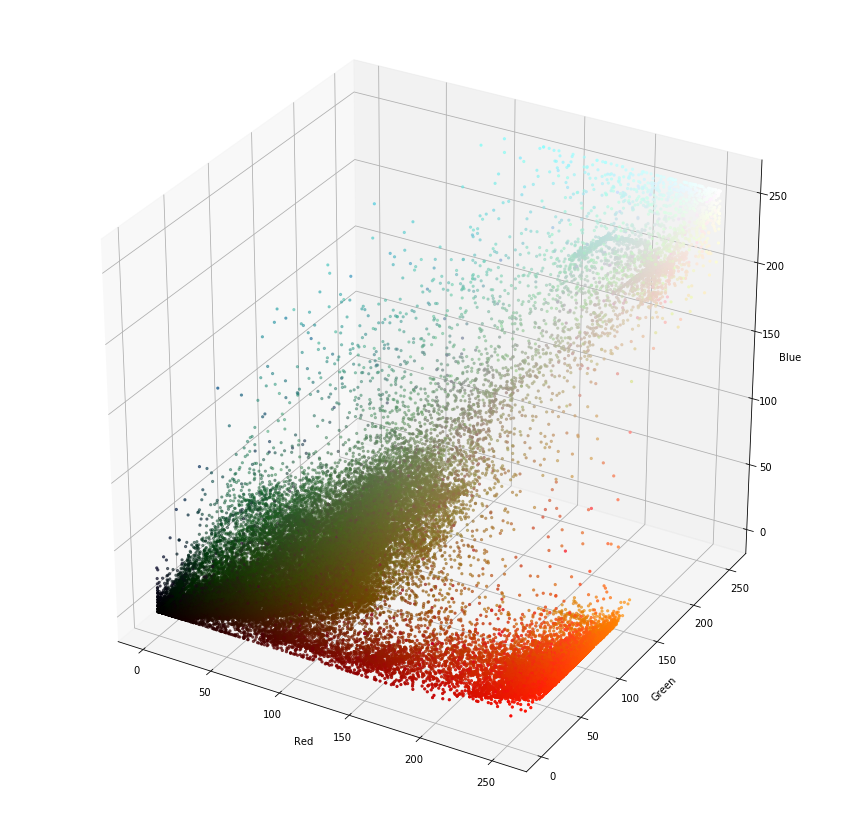

In [9]:
# Splitting components of image
r, g, b = cv2.split(nemo)

# Creating Figure for 3D plot
fig = plt.figure()
fig.set_size_inches(15, 15)
axis = fig.add_subplot(1, 1, 1, projection='3d')

# Normalising list of pixels
pixel_colors = nemo.reshape((np.shape(nemo)[0] * np.shape(nemo)[1], 3))
norm = colors.Normalize(vmin=-1., vmax=1.)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()

# Plotting
axis.scatter(r.flatten(), g.flatten(), b.flatten(), facecolors=pixel_colors, marker='.')
axis.set_xlabel("Red")
axis.set_ylabel("Green")
axis.set_zlabel("Blue")
plt.show()

## HSV Colour Space
<img src="../resources/HSV_color_space.png">

In [10]:
# Convert the image from RGB to HSV
hsv_nemo = cv2.cvtColor(nemo, cv2.COLOR_RGB2HSV)

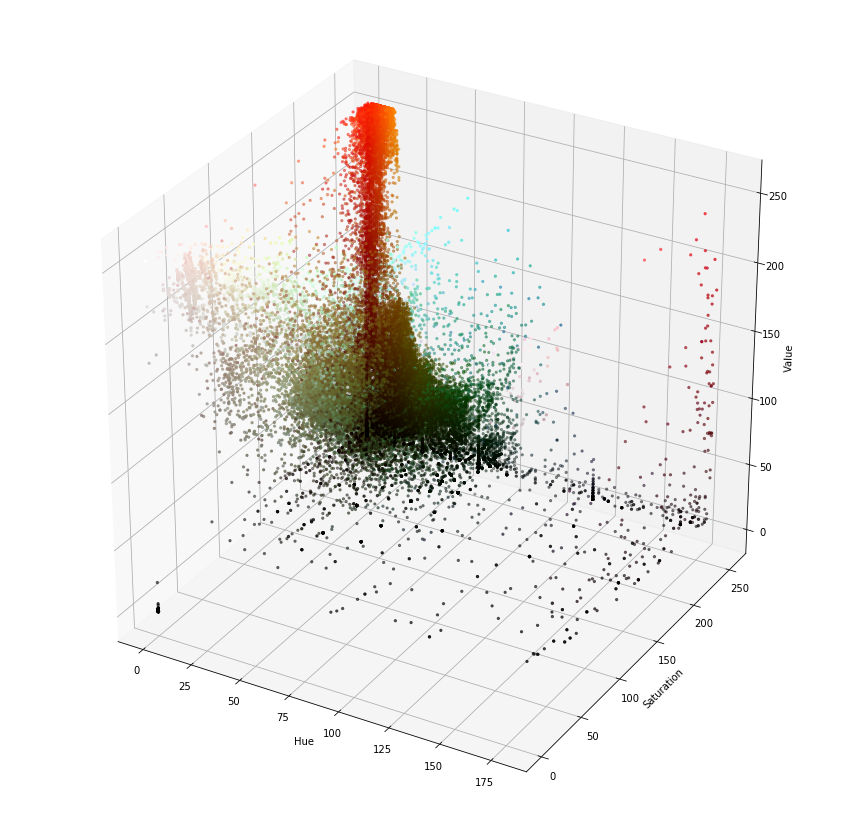

In [11]:
# Plotting distribution of pixels in 3D HSV colour space
h, s, v = cv2.split(hsv_nemo)
fig = plt.figure()
fig.set_size_inches(15, 15)
axis = fig.add_subplot(1, 1, 1, projection="3d")

axis.scatter(h.flatten(), s.flatten(), v.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Hue")
axis.set_ylabel("Saturation")
axis.set_zlabel("Value")
plt.show()

In [12]:
# Thresholds for segmenting Nemo
light_orange = (1, 190, 200)
dark_orange = (18, 255, 255)

In [13]:
# Segmenting Nemo according to thresholds, using a mask
mask = cv2.inRange(hsv_nemo, light_orange, dark_orange)
segmented_nemo = cv2.bitwise_and(nemo, nemo, mask=mask)

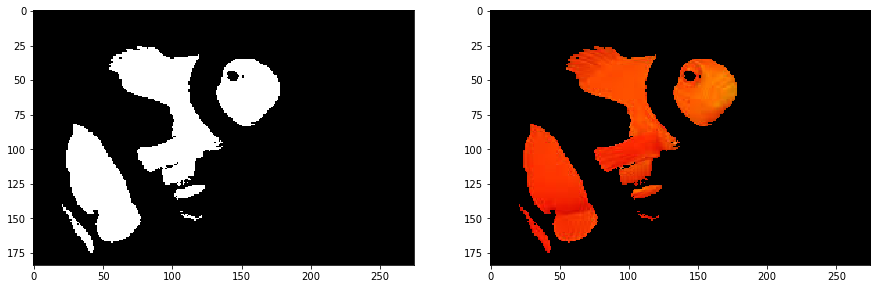

In [14]:
fig = plt.figure()
fig.set_size_inches(15, 15)
plt.subplot(1, 2, 1)
plt.imshow(mask, cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(segmented_nemo)
plt.show()

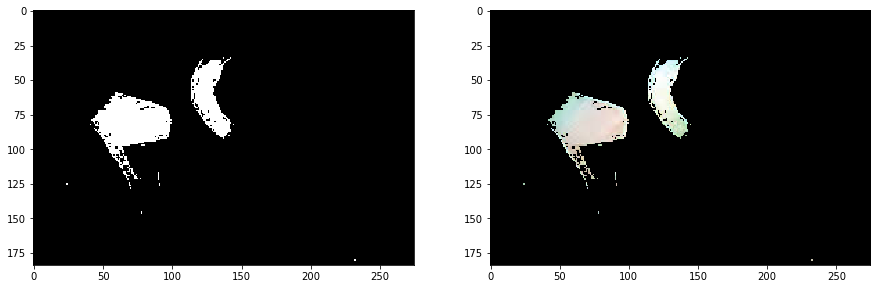

In [15]:
# Segmenting white stripes of Nemo
light_white = (0, 0, 200)
dark_white = (145, 60, 255)

mask_white = cv2.inRange(hsv_nemo, light_white, dark_white)
result_white = cv2.bitwise_and(nemo, nemo, mask=mask_white)

fig = plt.figure()
fig.set_size_inches(15, 15)
plt.subplot(1, 2, 1)
plt.imshow(mask_white, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(result_white)
plt.show()

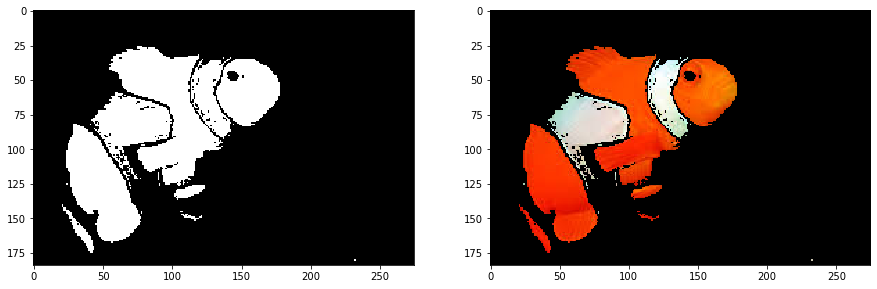

In [16]:
# Segmenting both white and orange parts of Nemo
final_mask = mask + mask_white
final_result = cv2.bitwise_and(nemo, nemo, mask=final_mask)

fig = plt.figure()
fig.set_size_inches(15, 15)
plt.subplot(1, 2, 1)
plt.imshow(final_mask, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(final_result)
plt.show()

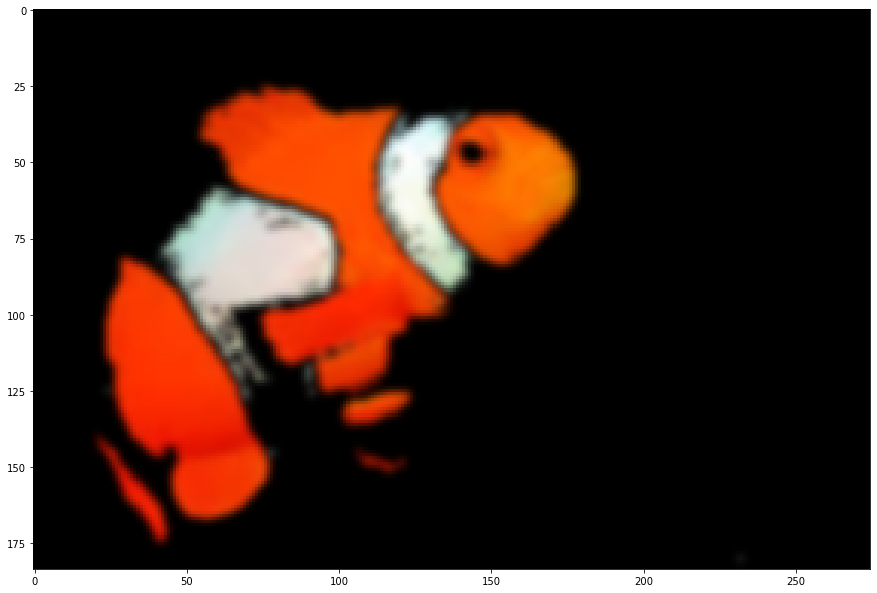

In [17]:
# Blurring to smoothen dark dots in the middle of Nemo
blur = cv2.GaussianBlur(final_result, (7, 7), 0)

fig = plt.figure()
fig.set_size_inches(15, 15)
plt.imshow(blur)
plt.show()

# Segmentation of blue bird

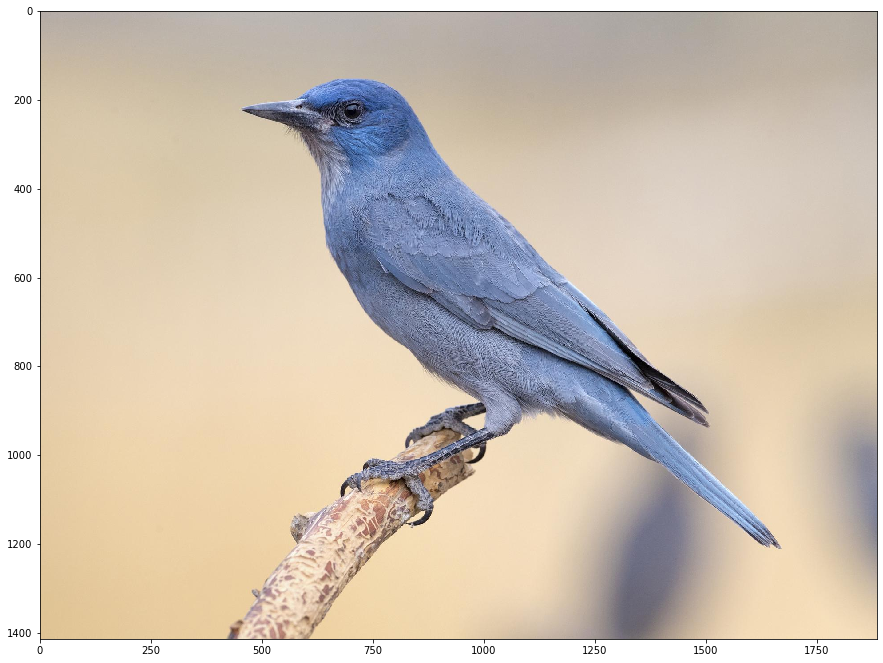

In [18]:
bird = cv2.imread('../resources/bird.jpg')
bird = cv2.cvtColor(bird, cv2.COLOR_BGR2RGB)

fig = plt.figure()
fig.set_size_inches(15, 15)
plt.imshow(bird)
plt.show()

In [19]:
# Convert the image from RGB to HSV
hsv_bird = cv2.cvtColor(bird, cv2.COLOR_RGB2HSV)

In [20]:
# Normalising list of pixels
pixel_colors_bird = bird.reshape((np.shape(bird)[0] * np.shape(bird)[1], 3))
norm = colors.Normalize(vmin=-1., vmax=1.)
norm.autoscale(pixel_colors_bird)
pixel_colors_bird = norm(pixel_colors_bird).tolist()

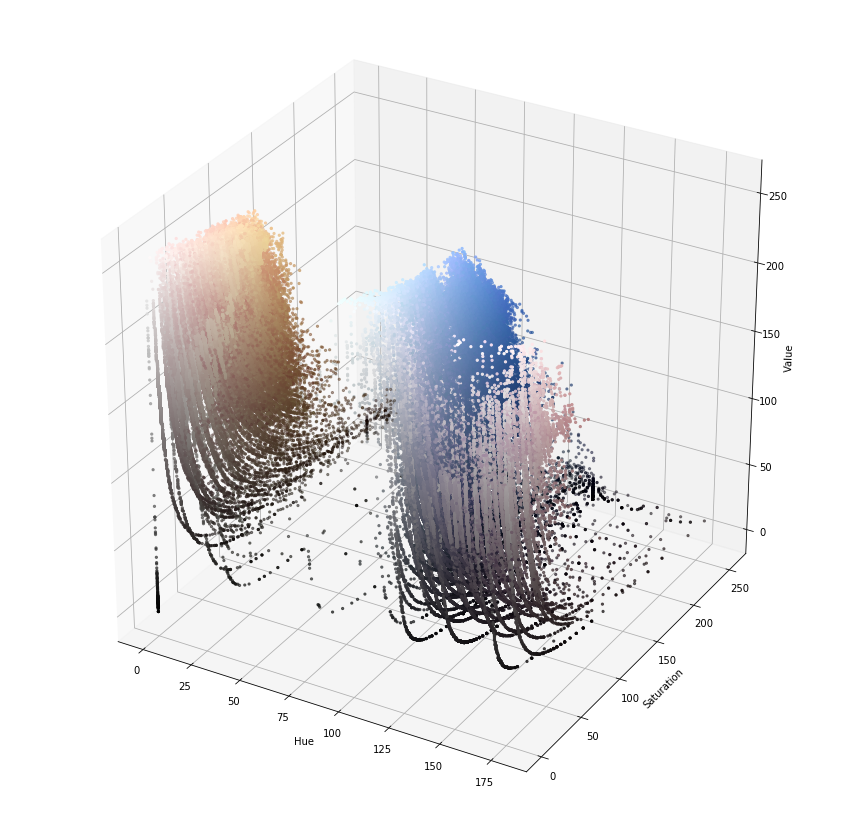

In [21]:
# Plotting distribution of pixels in 3D HSV colour space
h, s, v = cv2.split(hsv_bird)
fig = plt.figure()
fig.set_size_inches(15, 15)
axis = fig.add_subplot(1, 1, 1, projection="3d")

axis.scatter(h.flatten(), s.flatten(), v.flatten(), facecolors=pixel_colors_bird, marker=".")
axis.set_xlabel("Hue")
axis.set_ylabel("Saturation")
axis.set_zlabel("Value")
plt.show()

In [22]:
light_blue = (100, 10, 155)
dark_blue = (160, 250, 255)

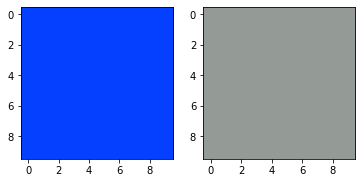

In [23]:
lb_square = np.full((10, 10, 3), light_blue, dtype=np.uint8) / 255.0
db_square = np.full((10, 10, 3), dark_blue, dtype=np.uint8) / 255.0

plt.subplot(1, 2, 1)
plt.imshow(hsv_to_rgb(db_square))
plt.subplot(1, 2, 2)
plt.imshow(hsv_to_rgb(lb_square))
plt.show()

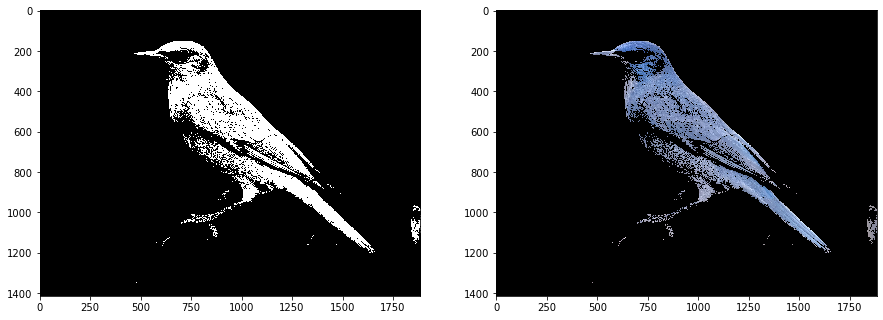

In [24]:
mask_blue = cv2.inRange(hsv_bird, light_blue, dark_blue)
result_blue = cv2.bitwise_and(bird, bird, mask=mask_blue)

fig = plt.figure()
fig.set_size_inches(15, 15)
plt.subplot(1, 2, 1)
plt.imshow(mask_blue, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(result_blue)
plt.show()

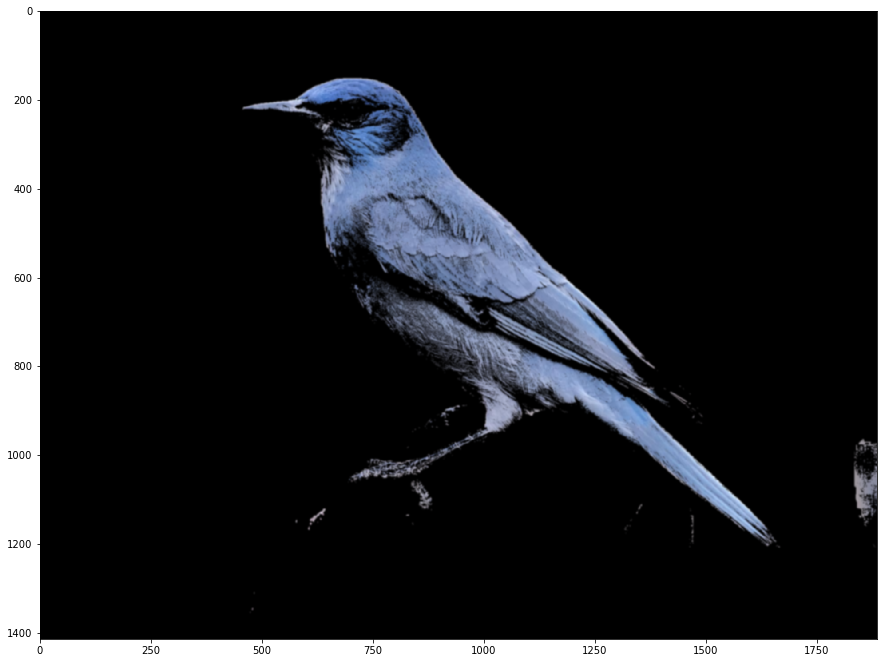

In [25]:
# Blurring to smoothen dark dots in the middle of Nemo
blur_bird = cv2.GaussianBlur(result_blue, (9, 9), 0)

fig = plt.figure()
fig.set_size_inches(15, 15)
plt.imshow(blur_bird)
plt.show()

# Segmentation of red rose

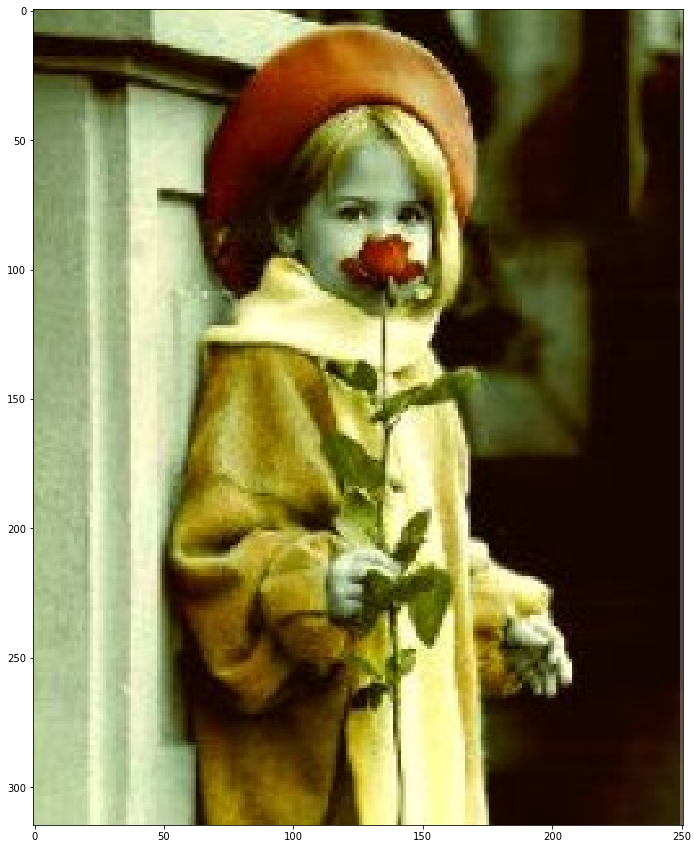

In [26]:
rose = cv2.imread('../resources/ninia_y_rosa.jpg')
rose = cv2.cvtColor(rose, cv2.COLOR_BGR2RGB)

fig = plt.figure()
fig.set_size_inches(15, 15)
plt.imshow(rose)
plt.show()

In [27]:
# Convert the image from RGB to HSV
hsv_rose = cv2.cvtColor(rose, cv2.COLOR_RGB2HSV)

In [28]:
# Normalising list of pixels
pixel_colors_rose = rose.reshape((np.shape(rose)[0] * np.shape(rose)[1], 3))
norm = colors.Normalize(vmin=-1., vmax=1.)
norm.autoscale(pixel_colors_rose)
pixel_colors_rose = norm(pixel_colors_rose).tolist()

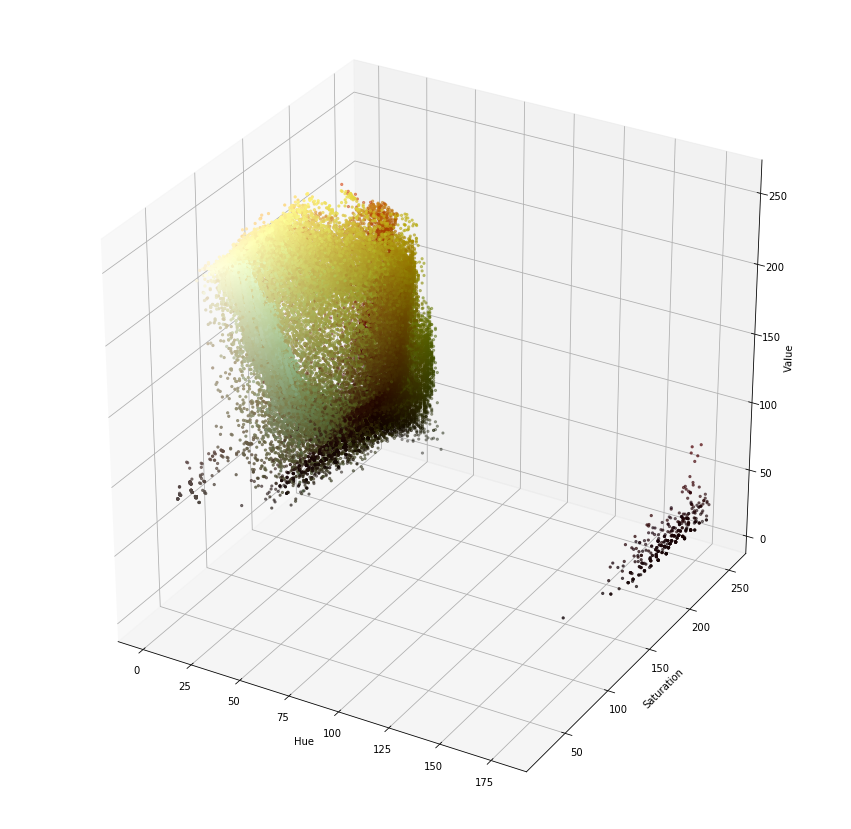

In [29]:
# Plotting distribution of pixels in 3D HSV colour space
h, s, v = cv2.split(hsv_rose)
fig = plt.figure()
fig.set_size_inches(15, 15)
axis = fig.add_subplot(1, 1, 1, projection="3d")

axis.scatter(h.flatten(), s.flatten(), v.flatten(), facecolors=pixel_colors_rose, marker=".")
axis.set_xlabel("Hue")
axis.set_ylabel("Saturation")
axis.set_zlabel("Value")
plt.show()

In [36]:
light_red = (0, 200, 30)
dark_red = (10, 255, 170)

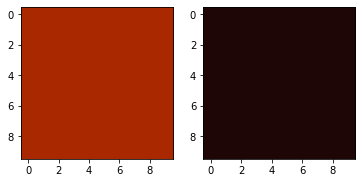

In [37]:
lr_square = np.full((10, 10, 3), light_red, dtype=np.uint8) / 255.0
dr_square = np.full((10, 10, 3), dark_red, dtype=np.uint8) / 255.0

plt.subplot(1, 2, 1)
plt.imshow(hsv_to_rgb(dr_square))
plt.subplot(1, 2, 2)
plt.imshow(hsv_to_rgb(lr_square))
plt.show()

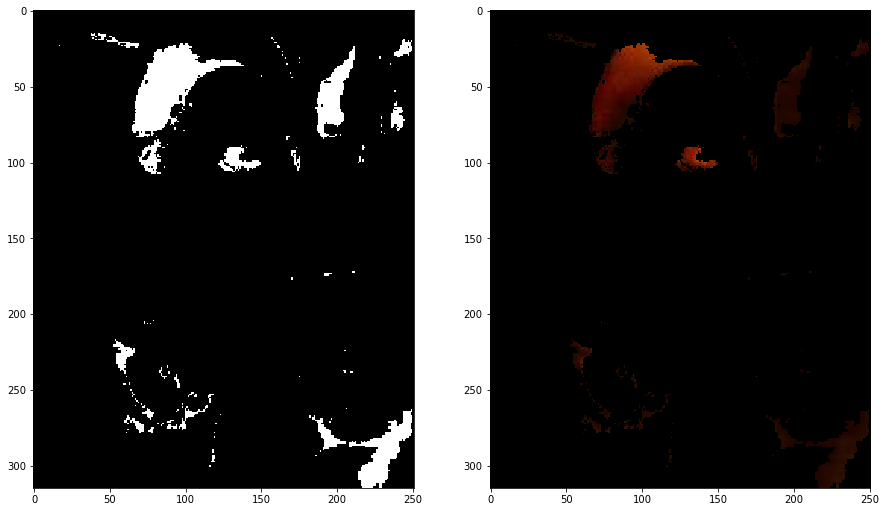

In [38]:
mask_red = cv2.inRange(hsv_rose, light_red, dark_red)
result_red = cv2.bitwise_and(rose, rose, mask=mask_red)

fig = plt.figure()
fig.set_size_inches(15, 15)
plt.subplot(1, 2, 1)
plt.imshow(mask_red, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(result_red)
plt.show()

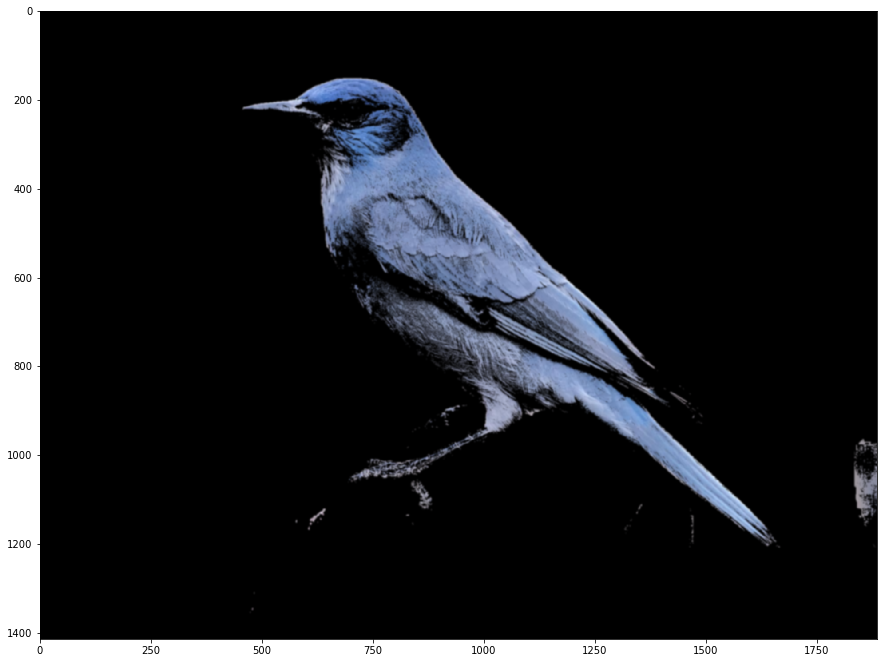

In [ ]:
# Blurring to smoothen dark dots in the middle of Nemo
blur_rose = cv2.GaussianBlur(result_red, (9, 9), 0)

fig = plt.figure()
fig.set_size_inches(15, 15)
plt.imshow(blur_rose)
plt.show()